# The analysis of what sorts of people were likely to survive.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('train.csv',na_values=[" "]) 
data.fillna(data.mean(),inplace =True)
data.drop('Cabin',axis=1,inplace=True)

In [3]:
#  Read top 5 records
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [4]:
# Read last 5 records
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,370376,7.75,Q


In [5]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [6]:
# check the Unique values from Embarked
data.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [7]:
# mode of Embarked
data.Embarked.mode() 

0    S
dtype: object

In [8]:
#Replace the Na values with the mode
data['Embarked'].fillna("S",inplace=True)
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [9]:
#some statistical information about our dataset.
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
#data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


# Univariate Analysis

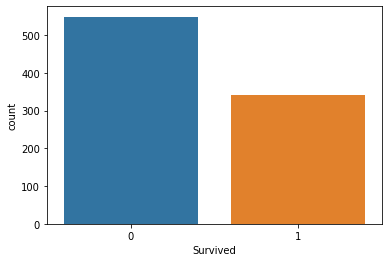

In [11]:
# to do the count by the categorical data columns
sns.countplot(x='Survived', data=data);

Survived = 1 and Not survived =0

In [12]:
# Values of the above graph
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Exploration of Categorical Variables

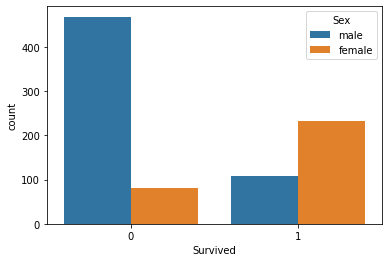

In [13]:
s=sns.countplot(x='Survived',hue='Sex', data=data);

From the above graph number of Females are more servived than male.

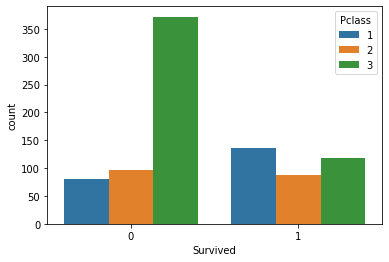

In [14]:
a=sns.countplot(x='Survived',hue='Pclass', data=data);

From the above graph : it shows most of Survived people travel from 1st class.

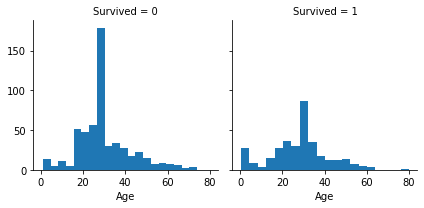

In [15]:
#Gridmap of Survived and Age 
a = sns.FacetGrid(data, col='Survived')
a.map(plt.hist, 'Age', bins=20)

This map shows that most of survived people age is between 20 to 40.

C:\Users\Pratik\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


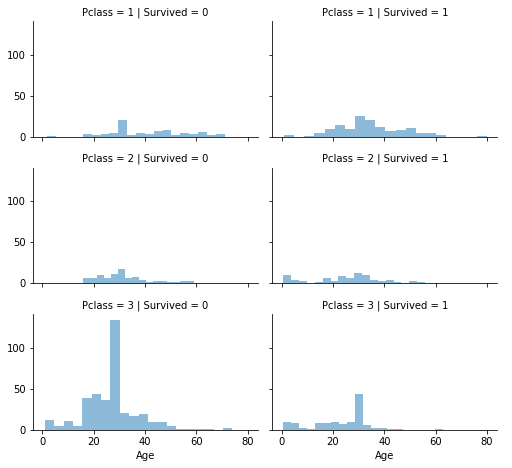

In [16]:
#GridMap of Survived and Pclass with Age
b = sns.FacetGrid(data, col='Survived', row='Pclass', size=2.2, aspect=1.6)
b.map(plt.hist, 'Age', alpha=.5, bins=20)
b.add_legend();

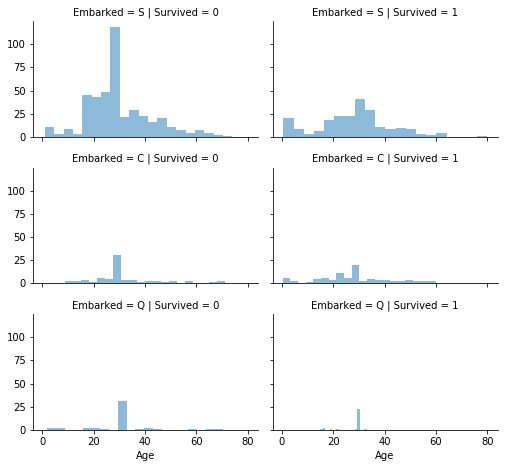

In [17]:
#gribmap of Survived and Embarked With age
b = sns.FacetGrid(data, col='Survived', row='Embarked', size=2.2, aspect=1.6)
b.map(plt.hist, 'Age', alpha=.5, bins=20)
b.add_legend();

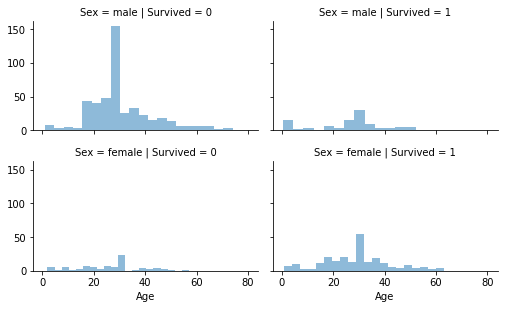

In [18]:
#GridMap of 
b = sns.FacetGrid(data, col='Survived', row='Sex', size=2.2, aspect=1.6)
b.map(plt.hist, 'Age', alpha=.5, bins=20)
b.add_legend();

In [19]:
# get dummies of Sex
sex= pd.get_dummies(data['Sex'], prefix = 'Sex')
sex.head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [20]:
# get Dummies of Pclass
Pclass= pd.get_dummies(data['Pclass'], prefix = 'Pclass')
Pclass.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [21]:
#get dummies of Embarked
Embark = pd.get_dummies(data['Embarked'], prefix = 'Embarked')
Embark.head(10)

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0


In [22]:
# concating the data
df = pd.concat([data,sex,Embark,Pclass], axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,0,0,1,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,0,0,1,0,0,1


In [23]:
# drop the unwanted data
df.drop(['Sex', 'Embarked', 'PassengerId', 'Name', 'Ticket', 'Pclass'], axis=1, inplace=True)
df.head()

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1,1,0,0
4,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1


# TRAIN AND TEST DATA

In [24]:
#slicing the data
x=df.drop("Survived",axis=1)
y=df["Survived"]

In [25]:
x

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.000000,1,0,7.2500,0,1,0,0,1,0,0,1
1,38.000000,1,0,71.2833,1,0,1,0,0,1,0,0
2,26.000000,0,0,7.9250,1,0,0,0,1,0,0,1
3,35.000000,1,0,53.1000,1,0,0,0,1,1,0,0
4,35.000000,0,0,8.0500,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.000000,0,0,13.0000,0,1,0,0,1,0,1,0
887,19.000000,0,0,30.0000,1,0,0,0,1,1,0,0
888,29.699118,1,2,23.4500,1,0,0,0,1,0,0,1
889,26.000000,0,0,30.0000,0,1,1,0,0,1,0,0


In [26]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [27]:
#spliting 
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train, Y_test=train_test_split(x,y,test_size=0.25,random_state=0)
X_train

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
105,28.000000,0,0,7.8958,0,1,0,0,1,0,0,1
68,17.000000,4,2,7.9250,1,0,0,0,1,0,0,1
253,30.000000,1,0,16.1000,0,1,0,0,1,0,0,1
320,22.000000,0,0,7.2500,0,1,0,0,1,0,0,1
706,45.000000,0,0,13.5000,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
835,39.000000,1,1,83.1583,1,0,1,0,0,1,0,0
192,19.000000,1,0,7.8542,1,0,0,0,1,0,0,1
629,29.699118,0,0,7.7333,0,1,0,1,0,0,0,1
559,36.000000,1,0,17.4000,1,0,0,0,1,0,0,1


In [28]:
X_test

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
495,29.699118,0,0,14.4583,0,1,1,0,0,0,0,1
648,29.699118,0,0,7.5500,0,1,0,0,1,0,0,1
278,7.000000,4,1,29.1250,0,1,0,1,0,0,0,1
31,29.699118,1,0,146.5208,1,0,1,0,0,1,0,0
255,29.000000,0,2,15.2458,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
167,45.000000,1,4,27.9000,1,0,0,0,1,0,0,1
306,29.699118,0,0,110.8833,1,0,1,0,0,1,0,0
379,19.000000,0,0,7.7750,0,1,0,0,1,0,0,1
742,21.000000,2,2,262.3750,1,0,1,0,0,1,0,0


In [29]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(X_train)
x_test=sc.transform(X_test)
x_train
x_test

array([[-0.01241996, -0.46037161, -0.47720996, ..., -0.56813051,
        -0.51027185,  0.90562878],
       [-0.01241996, -0.46037161, -0.47720996, ..., -0.56813051,
        -0.51027185,  0.90562878],
       [-1.76472627,  2.98532288,  0.73949329, ..., -0.56813051,
        -0.51027185,  0.90562878],
       ...,
       [-0.83836094, -0.46037161, -0.47720996, ..., -0.56813051,
        -0.51027185,  0.90562878],
       [-0.68396671,  1.26247564,  1.95619654, ...,  1.76015894,
        -0.51027185, -1.10420519],
       [-1.99631761,  0.40105202,  0.73949329, ..., -0.56813051,
        -0.51027185,  0.90562878]])

In [30]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train, Y_train)

C:\Users\Pratik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
y_pred= classifier.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1], dtype=int64)

In [32]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)
cm

array([[116,  23],
       [ 23,  61]], dtype=int64)

In [33]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(Y_test,y_pred)*100)

Accuracy: 79.37219730941703


In [34]:
from sklearn.metrics import classification_report
classification_report(Y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.83      0.83      0.83       139\n           1       0.73      0.73      0.73        84\n\n    accuracy                           0.79       223\n   macro avg       0.78      0.78      0.78       223\nweighted avg       0.79      0.79      0.79       223\n'